In [1]:
import sys
sys.path.append('..')

from tqdm import tqdm

from src.data.load_data import get_hackernews_files, load_hackernews_dataframe

In [9]:
files = get_hackernews_files()
for file_ in tqdm(files):
    df = load_hackernews_dataframe(file_)
    file_name = file_.split('/')[-1] + '.csv'
    df.to_csv('../data/raw/hackernews/csv/' + file_name, index=False)
    del df


  0%|          | 0/14 [00:00<?, ?it/s]
Exception in thread Thread-9:
Traceback (most recent call last):
  File "/Users/Fabian/anaconda/envs/graph-mining/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/Fabian/anaconda/envs/graph-mining/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/Fabian/anaconda/envs/graph-mining/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

100%|██████████| 14/14 [08:31<00:00, 36.51s/it]


In [1]:
import sqlite3
import pandas as pd

In [4]:
conn = sqlite3.connect('../data/raw/hackernews/csv/hackernews.sl3')
cursor = conn.cursor()

In [6]:
%%time
cursor.execute('SELECT COUNT(*) FROM hackernews')
print(cursor.fetchone())

(12557524,)
CPU times: user 671 ms, sys: 1.71 s, total: 2.38 s
Wall time: 2.38 s


In [11]:
%%time
cursor.execute('SELECT DISTINCT by from hackernews')
print(len(cursor.fetchall()))

417544
CPU times: user 26.3 s, sys: 6.5 s, total: 32.8 s
Wall time: 33.2 s


In [30]:
%%time
df = pd.read_sql_query('SELECT * FROM hackernews LIMIT 5', conn)
print(df.head())

           by dead deleted descendants       id                         kids  \
0    angelbob                           2056830                                
1      btilly                           2056831                                
2    dfischer                           2056832  [2056858, 2057679, 2056836]   
3  Calamitous                           2056833                    [2056992]   
4   emilsedgh                           2056834                                

      parent parts poll retrieved_on score  \
0  2056436.0              1502933012         
1  2056673.0              1502933012         
2  2056725.0              1502933012         
3  2056729.0              1502933012         
4  2055652.0              1502933012         

                                                text        time title  \
0  That would be "don't take much money."  To avo...  1293840015         
1  It depends on the agreement.<p>For instance yo...  1293840140         
2                   

In [5]:
%%time
df = pd.read_sql_query('SELECT by, COUNT(*) FROM hackernews GROUP BY by', conn)

CPU times: user 19.9 s, sys: 4.01 s, total: 23.9 s
Wall time: 28.3 s


In [20]:
df = df[df['by'] != '']

Text(0,0.5,'Count')

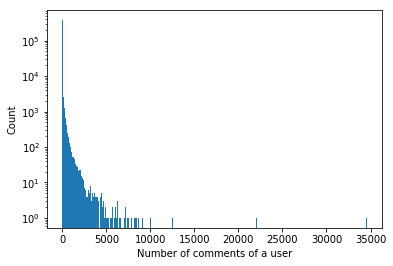

In [21]:
import matplotlib.pyplot as plt
df['COUNT(*)'].hist(bins=1000, grid=False)
plt.yscale('log', nonposy='clip')
plt.xlabel('Number of comments of a user')
plt.ylabel('Count')

In [22]:
df.sort_values('COUNT(*)', ascending=False).head()

,by,COUNT(*)
384453,tptacek,34556
202407,jacquesm,22049
14656,DanBC,17548
143108,dragonwriter,16650
127332,dang,14835
